# SEED sur Tensorflow et Keras
<img src="https://cdn.pixabay.com/photo/2019/02/11/15/30/germination-3989958_960_720.png">


## En machine learning on utilise souvent l'aléatoire.
* Pour le split des données
* Pour l'initialisation, par exemple les poids.
* Pour l'optimisation, telle que l'optimisation stochastique.

Ces paramètres aléatoires, signifient que lorsque vous exécutez la même fonction ou le même algorithme sur les mêmes données, vous avez la garantie d'obtenir des résultats différents.

<img src="https://cdn.pixabay.com/photo/2018/09/18/11/19/artificial-intelligence-3685928__340.png">

## Obtenir des résultats reproductibles 

Lorsqu'un ordinateur génère un nombre aléatoire, ce n'est pas vraiment «aléatoire» et est en fait pseudo-aléatoire. 
La SEED peut être considérée comme un paramètre déterminant la séquence des nombres pseudo-aléatoires générés.
Par défault la SEED est créer automatiquement, mais si on veut obtenir des résultats reproductibles, on peut également la définir.

In [1]:
import tensorflow as tf



g = tf.Graph() 
with g.as_default():   
      
    a = tf.random.uniform([1], seed=42)   
    assert a.graph is g



f = tf.Graph() 
with f.as_default():   
  
     b = tf.random.uniform([1])   
     assert b.graph is f
        

In [2]:
sess1a = tf.compat.v1.Session(graph=g)
sess1b = tf.compat.v1.Session(graph=f)
print('Session 1 :')
print('a :',sess1a.run(a),sess1a.run(a))
print('b :',sess1b.run(b),sess1b.run(b))

sess2a = tf.compat.v1.Session(graph=g)
sess2b = tf.compat.v1.Session(graph=f)
print('Session 2 :')
print('a :',sess2a.run(a), sess2a.run(a))
print('b :', sess2b.run(b), sess2b.run(b))


Session 1 :
a : [0.95227146] [0.8960779]
b : [0.1370461] [0.6016282]
Session 2 :
a : [0.95227146] [0.8960779]
b : [0.27338827] [0.7319329]


In [3]:
import pandas as pd
promo = pd.read_csv('promo_bordeaux.csv')
splits = pd.DataFrame(columns=['Split 1','Split 2','Split 3','Split 4'])
 

## Exemple de split en utilisant une SEED

In [4]:
from sklearn.model_selection import train_test_split

VAL_SIZE = 0.2
SPLIT_SEED = 42

train1, test1 = train_test_split(promo, test_size=VAL_SIZE)
train2, test2 = train_test_split(promo, test_size=VAL_SIZE)


train3, test3 = train_test_split(promo, test_size=VAL_SIZE, random_state=SPLIT_SEED)
train4, test4 = train_test_split(promo, test_size=VAL_SIZE, random_state=SPLIT_SEED)


In [5]:
splits['Split 1'] = list(test1['Prenom'])
splits['Split 2'] = list(test2['Prenom'])
splits['Split 3'] = list(test3['Prenom'])
splits['Split 4'] = list(test4['Prenom'])


In [6]:
splits


,Split 1,Split 2,Split 3,Split 4
0,Damien,Pierre,Silvia,Silvia
1,Christophe,Damien,Julien,Julien
2,Nicolas,Rachel,Christophe,Christophe
3,Corantin,Thibaud,Baptiste,Baptiste
4,Yohan,Mehdi,Maud,Maud


## Initiliser la SEED 

In [7]:
SEED = 42


## Initialiser une SEED dans l'environnement Python

In [8]:
import os
os.environ['PYTHONHASHSEED']=str(SEED)


<img src="http://math.pc.vh.free.fr/info/graphics/python_logo.png">

## Initializer une SEED dans le module random de Python

In [9]:
import random as rn
rn.seed(SEED)


<img src="https://cdn.pixabay.com/photo/2013/07/13/13/41/dice-161376__340.png">

## Initializer une SEED dans Numpy

In [10]:
import numpy as np
np.random.seed(SEED)


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/775px-NumPy_logo.svg.png">

## Initializer une SEED dans Tensorflow

In [11]:
import tensorflow as tf
tf.random.set_seed(SEED)


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Tensorflow_logo.svg/220px-Tensorflow_logo.svg.png">

## Initializer une SEED pour Keras

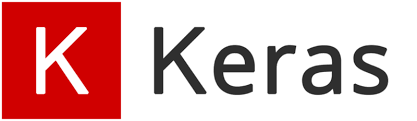

In [12]:

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)


session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

tf.random.set_seed(SEED)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)
